In [1]:
!pip install envirocar-py --upgrade

Requirement already up-to-date: envirocar-py in /opt/anaconda3/lib/python3.7/site-packages (0.0.2)


In [3]:
%load_ext autoreload
%autoreload 2

# load dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import folium 
import seaborn as sns
import osmnx as ox
import networkx as nx
import pyproj
import math 
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
bbox = BboxSelector([
    9.918594360351562, # min_x
    53.50315910192688, # min_y
    10.110855102539062, # max_x
    53.59291234778207  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
#display output
track_df

,id,time,geometry,GPS Accuracy.value,GPS Accuracy.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,GPS Speed.value,GPS Speed.unit,GPS Altitude.value,...,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,track.appVersion,track.touVersion,Long-Term Fuel Trim 1.value,Long-Term Fuel Trim 1.unit,Short-Term Fuel Trim 1.value,Short-Term Fuel Trim 1.unit
0,5cdcea6d44ea85030283f9df,2019-04-15T07:57:44,POINT (7.62735 51.80645),2.3,%,0.336020,ratio,134.906554,km/h,63.912372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5cdcea6d44ea85030283f9e1,2019-04-15T07:57:49,POINT (7.62600 51.80786),2.2,%,0.138903,ratio,130.448702,km/h,65.513918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5cdcea6d44ea85030283f9e2,2019-04-15T07:57:54,POINT (7.62462 51.80922),2.1,%,0.090592,ratio,132.323921,km/h,66.223409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5cdcea6d44ea85030283f9e3,2019-04-15T07:57:59,POINT (7.62314 51.81063),2.0,%,0.132368,ratio,133.438745,km/h,66.612251,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5cdcea6d44ea85030283f9e4,2019-04-15T07:58:04,POINT (7.62164 51.81202),2.0,%,0.162579,ratio,132.869762,km/h,67.179196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,53f20f74e4b0d0547747de5d,2014-06-08T16:05:57,POINT (9.28521 53.19534),4.0,%,NaN,NaN,44.100000,km/h,65.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,7.03125,%,2.34375,%
1127,53f20f74e4b0d0547747de5f,2014-06-08T16:06:03,POINT (9.28605 53.19585),8.0,%,NaN,NaN,47.700000,km/h,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,10.15625,%,5.46875,%
1128,53f20f74e4b0d0547747de61,2014-06-08T16:06:09,POINT (9.28683 53.19621),5.0,%,NaN,NaN,31.500000,km/h,69.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.37500,%,7.03125,%
1129,53f20f74e4b0d0547747de63,2014-06-08T16:06:15,POINT (9.28731 53.19595),5.0,%,NaN,NaN,30.600000,km/h,68.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.68750,%,2.34375,%


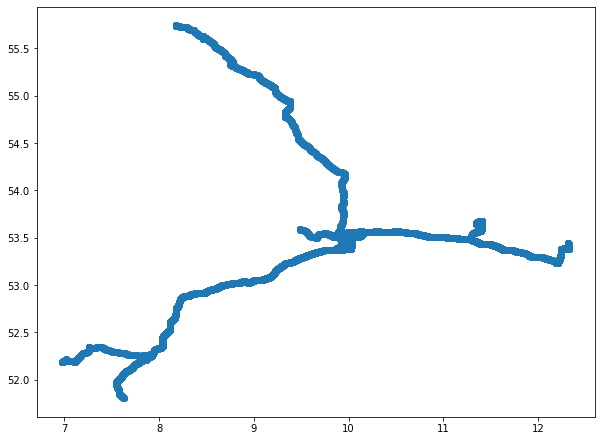

In [5]:
track_df.plot(figsize=(10, 12))

In [6]:
track_df.describe()

,GPS Accuracy.value,O2 Lambda Voltage ER.value,GPS Speed.value,GPS Altitude.value,Engine Load.value,GPS Bearing.value,Speed.value,Intake Pressure.value,Intake Temperature.value,Throttle Position.value,...,track.length,sensor.engineDisplacement,sensor.constructionYear,Consumption.value,Calculated MAF.value,CO2.value,O2 Lambda Current ER.value,O2 Lambda Current.value,Long-Term Fuel Trim 1.value,Short-Term Fuel Trim 1.value
count,27372.000000,2043.000000,27372.000000,27372.000000,9320.000000,26648.000000,25008.000000,25008.000000,24966.000000,9320.000000,...,27372.000000,27372.000000,27372.000000,6263.000000,21949.000000,6263.000000,1015.000000,1015.000000,5772.000000,5772.000000
mean,6.768645,0.340696,101.053389,77.614779,40.672293,175.627977,102.546225,75.770110,89.796913,47.679715,...,170.036993,1770.166484,2010.543073,10.891273,19.697738,25.594492,1.663868,-7.257891,-0.452075,0.208036
std,3.851232,0.559808,37.880169,31.715651,25.723145,103.954156,36.624245,40.933209,66.655859,29.958889,...,201.375507,367.192439,4.111629,7.362146,13.319433,17.301044,0.324491,67.313416,6.011252,2.623296
min,1.500000,0.059025,-308.447929,-24.651999,0.000000,-370.999985,0.000000,10.000000,1.000000,5.000000,...,0.000000,1598.000000,2003.000000,0.834954,0.000000,1.962142,0.985220,-127.662640,-13.281250,-14.062500
25%,3.000000,0.097378,83.091004,62.000000,18.431372,79.000000,85.000000,45.000000,15.000000,24.000000,...,0.000000,1600.000000,2011.000000,4.769779,10.912204,11.208980,1.432639,-64.083505,-4.687500,-1.562500
50%,5.000000,0.112489,112.500000,79.000000,39.585889,190.300003,113.000000,73.000000,89.000000,36.000000,...,0.000000,1600.000000,2011.000000,9.601972,16.516891,22.564634,1.702778,-10.466729,-2.343750,0.000000
75%,10.000000,0.179301,126.900000,91.099976,61.535868,272.200012,127.000000,88.000000,151.000000,84.000003,...,450.813642,1968.000000,2014.000000,16.557731,23.640526,38.910669,1.999969,47.814893,3.906250,1.562500
max,51.000000,1.999939,254.848383,200.299988,100.000003,359.772995,250.753333,255.000008,209.000000,98.000000,...,450.813642,4163.000000,2014.000000,89.647054,272.713807,210.670576,1.999970,106.371704,16.406250,13.281250


In [7]:
track_df.groupby(track_df['track.id']).count()

,id,time,geometry,GPS Accuracy.value,GPS Accuracy.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,GPS Speed.value,GPS Speed.unit,GPS Altitude.value,...,O2 Lambda Current ER.value,O2 Lambda Current ER.unit,O2 Lambda Current.value,O2 Lambda Current.unit,track.appVersion,track.touVersion,Long-Term Fuel Trim 1.value,Long-Term Fuel Trim 1.unit,Short-Term Fuel Trim 1.value,Short-Term Fuel Trim 1.unit
track.id,,,,,,,,,,,,,,,,,,,,,
53f20f6ee4b0d0547747d58f,1131,1131,1131,1131,1131,0,0,1131,1131,1131,...,0,0,0,0,0,0,1131,1131,1131,1131
54f76d4ae4b0bf5f3ce07ee9,2333,2333,2333,2333,2333,0,0,2333,2333,2333,...,0,0,0,0,2333,2333,0,0,0,0
54f797c5e4b0bf5f3ce13e1f,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f7987ee4b0bf5f3ce19fbb,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f7996ee4b0bf5f3ce20157,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f79b67e4b0bf5f3ce265d3,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f79cd6e4b0bf5f3ce2e382,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f79df0e4b0bf5f3ce3451e,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0
54f79f39e4b0bf5f3ce3a6ba,834,834,834,834,834,0,0,834,834,834,...,0,0,0,0,834,834,0,0,0,0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 4.3000e+01, 1.1956e+04]),
 array([-3.27952615e+02, -2.95157353e+02, -2.62362092e+02, -2.29566831e+02,
        -1.96771569e+02, -1.63976308e+02, -1.31181046e+02, -9.83857850e+01,
        -6.55905236e+01, -3.27952622e+01, -7.57724024e-07]),
 <a list of 10 Patch objects>)

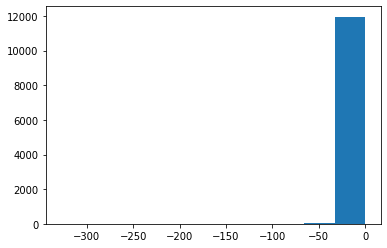

In [8]:
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
track_df['speed'] = track_df['GPS Speed.value']
#track_df
data_to_export = track_df[['track.id','lat','lng','speed']]
speed = data_to_export['speed']
#print(speed)
spd_list = []
index = 0
for cal in speed:
    currspd = cal
    if index > 0:
        diff = currspd - prvspd
        spd_list.append(diff)
    else:
        spd_list.append(0)
    prvspd = currspd
    index += 1

#print(len(spd_list))
data_to_export['spddiff']= spd_list
spdneg = data_to_export[data_to_export['spddiff']<0]
spdneg['spddiff'].mean()
#fig1, ax1 = plt.subplots()
#ax1.set_title('Basic Plot')
#ax1.boxplot(spdneg['spddiff'])

#x = spdneg['spddiff'](size=100)
#sns.distplot(spdneg['spddiff']);
plt.hist(spdneg['spddiff'])
            
#data_to_export.to_csv('poshan.csv')

In [9]:
np.mean(spdneg['spddiff'])

-4.159518325725712

In [10]:
def colors(array):
    col = []
    for value in array:
        if value < 0 and value > -5:
            col.append('#C2FF00')
        elif value < -5 and value > -20:
            col.append('green')
        else:
            col.append('red')
    return col

In [11]:
cols = colors(spdneg['spddiff'])
#cols

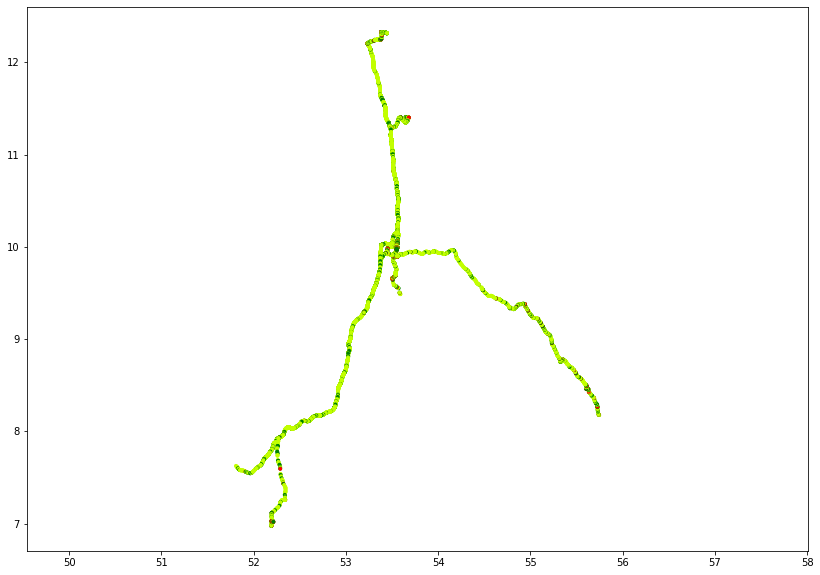

In [12]:
f,axxarr = plt.subplots(1, figsize = (14,10))
#x = np.arange(0,10,1)    
axxarr.scatter(spdneg['lat'], spdneg['lng'], c=cols, cmap='Accent', s=15, lw=0)

plt.axis('equal')
#axxarr.grid(True)
plt.show()

In [13]:
some_track_id = data_to_export['track.id'].unique()[0]
some_data = data_to_export[data_to_export['track.id'] == some_track_id]
some_data = some_data[some_data['spddiff'] < 0]
some_data

,track.id,lat,lng,speed,spddiff
1,5cdcea6d44ea85030283f9dd,51.807855,7.626002,130.448702,-4.457852
4,5cdcea6d44ea85030283f9dd,51.812016,7.621639,132.869762,-0.568984
7,5cdcea6d44ea85030283f9dd,51.816179,7.616924,137.473462,-1.024269
8,5cdcea6d44ea85030283f9dd,51.817553,7.615308,137.375204,-0.098259
9,5cdcea6d44ea85030283f9dd,51.818925,7.613679,135.989828,-1.385375
...,...,...,...,...,...
2024,5cdcea6d44ea85030283f9dd,53.550319,10.006804,0.000000,-8.025250
2028,5cdcea6d44ea85030283f9dd,53.551276,10.006193,21.705738,-8.137694
2029,5cdcea6d44ea85030283f9dd,53.551400,10.006165,1.115999,-20.589738
2030,5cdcea6d44ea85030283f9dd,53.551399,10.006195,0.000000,-1.115999


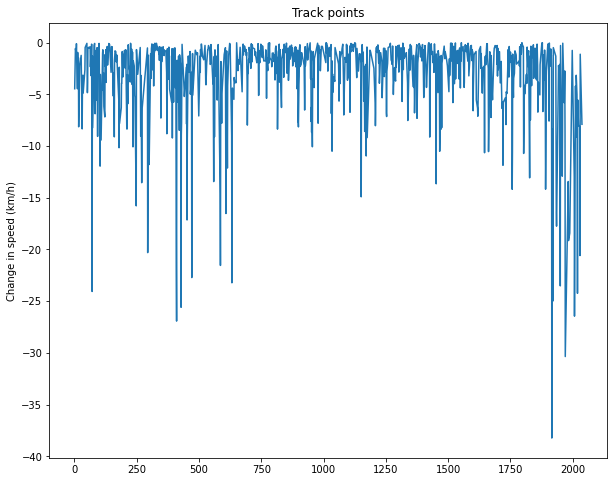

In [14]:
#plt.plot(some_data['spddiff'].plot(figsize= (10, 8)))
ax = some_data['spddiff'].plot(figsize= (10, 8))
ax.set_title("Track points")
ax.set_ylabel("Change in speed (km/h)")
ax        

In [15]:
cols_some = colors(some_data['spddiff'])
print(len(cols_some))
cols_some.pop()
len(cols_some)

965


964

In [164]:
import folium

lats = list(some_data['lat'])
lngs = list(some_data['lng'])
speed = list(some_data['spddiff']) 
speedactual = list(some_data['speed'])
avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)
def popfn(a,b):
    return('Speed Difference is: '+ str(a) +'\n Actual speed is:' + str(b))

m = folium.Map(location=[avg_lat, avg_lngs], tiles = 'cartodbpositron', zoom_start=8)
for lat, lng , col, pop,pop1 in zip(lats,lngs, cols_some, speed, speedactual ):
    folium.CircleMarker([lat, lng], color= col , radius=4.0, popup = popfn(pop, pop1)).add_to(m)
m

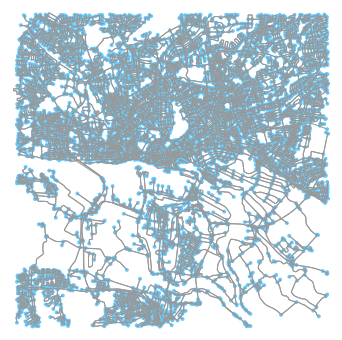

In [17]:
G = ox.graph_from_point((53.54, 10.00), dist=10000, network_type='drive')
ox.plot_graph(G)
#G.to_csv('hamburgosm.csv')
ox.save_graph_shapefile(G)

In [18]:
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
edges.columns

Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'length',
       'geometry', 'maxspeed', 'lanes', 'ref', 'bridge', 'junction', 'access',
       'width', 'tunnel', 'service', 'est_width'],
      dtype='object')

In [19]:
edges['geometry'].dtype

In [20]:
edges['geometry']

0          LINESTRING (9.95746 53.54878, 9.95698 53.54902)
1          LINESTRING (9.95746 53.54878, 9.95633 53.54804)
2        LINESTRING (10.03673 53.50174, 10.03695 53.501...
3          LINESTRING (9.95721 53.54917, 9.95698 53.54902)
4          LINESTRING (9.98495 53.59535, 9.98461 53.59545)
                               ...                        
33463      LINESTRING (9.93793 53.54855, 9.93836 53.54855)
33464    LINESTRING (9.93793 53.54855, 9.93794 53.54786...
33465    LINESTRING (9.93793 53.54855, 9.93794 53.54897...
33466    LINESTRING (9.99851 53.54989, 9.99860 53.54990...
33467    LINESTRING (9.99851 53.54989, 9.99793 53.54987...
Name: geometry, Length: 33468, dtype: geometry

In [21]:
edges['maxspeed'].mean

<bound method Series.mean of 0        NaN
1         30
2        NaN
3         30
4         50
        ... 
33463    NaN
33464     30
33465     30
33466     50
33467     50
Name: maxspeed, Length: 33468, dtype: object>

In [22]:
print(edges['maxspeed'].value_counts())

30                        14302
50                        12730
60                          386
[50, 30]                    272
20                          138
                          ...  
[120, 100]                    1
[80, 120]                     1
[80, 60, 50]                  1
[60, 120, 80, 50, 100]        1
[80, 50, 120]                 1
Name: maxspeed, Length: 61, dtype: int64


In [23]:
print(edges['highway'].value_counts())

residential                                   17579
tertiary                                       4465
secondary                                      4257
unclassified                                   2864
primary                                        2299
living_street                                   876
motorway_link                                   265
secondary_link                                  147
primary_link                                    122
trunk_link                                      114
[residential, living_street]                    110
motorway                                         98
tertiary_link                                    95
trunk                                            73
[residential, unclassified]                      68
road                                             16
[residential, tertiary]                           4
[motorway, motorway_link]                         3
[unclassified, tertiary]                          2
[residential

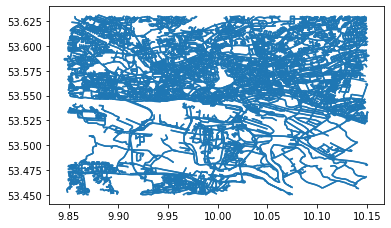

In [24]:
edges.plot()

In [25]:
edges.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,lanes,ref,bridge,junction,access,width,tunnel,service,est_width
0,26411008,266398601,0,24502396,Am Nobisteich,residential,False,41.891,"LINESTRING (9.95746 53.54878, 9.95698 53.54902)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26411008,26410989,0,40228311,Lincolnstraße,residential,True,111.426,"LINESTRING (9.95746 53.54878, 9.95633 53.54804)",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1165197312,1165197239,0,100819415,NaN,unclassified,False,52.931,"LINESTRING (10.03673 53.50174, 10.03695 53.501...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26411010,266398601,0,4338732,Herrenweide,residential,False,22.100,"LINESTRING (9.95721 53.54917, 9.95698 53.54902)",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5588615169,1561759859,0,584708067,Lokstedter Weg,primary,False,25.121,"LINESTRING (9.98495 53.59535, 9.98461 53.59545)",50,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
prjedge = edges.to_crs('EPSG:25832')
prjedge['geometry'] = prjedge.geometry.buffer(5)
prjedge.head()

,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,lanes,ref,bridge,junction,access,width,tunnel,service,est_width
0,26411008,266398601,0,24502396,Am Nobisteich,residential,False,41.891,"POLYGON ((563401.690 5933769.912, 563401.329 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26411008,26410989,0,40228311,Lincolnstraße,residential,True,111.426,"POLYGON ((563367.119 5933659.860, 563366.777 5...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1165197312,1165197239,0,100819415,NaN,unclassified,False,52.931,"POLYGON ((568779.245 5928591.656, 568788.348 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26411010,266398601,0,4338732,Herrenweide,residential,False,22.100,"POLYGON ((563408.640 5933770.450, 563408.298 5...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5588615169,1561759859,0,584708067,Lokstedter Weg,primary,False,25.121,"POLYGON ((565161.968 5938958.818, 565161.540 5...",50,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
some_trk = gpd.GeoDataFrame(
    some_data, geometry=gpd.points_from_xy(some_data.lng, some_data.lat),crs="EPSG:4326")
#some_trk.crs = "EPSG:4326"
some_trk_tr = some_trk.to_crs('EPSG:25832')
some_trk_tr

,track.id,lat,lng,speed,spddiff,geometry
1,5cdcea6d44ea85030283f9dd,51.807855,7.626002,130.448702,-4.457852,POINT (405273.087 5740560.439)
4,5cdcea6d44ea85030283f9dd,51.812016,7.621639,132.869762,-0.568984,POINT (404981.069 5741028.881)
7,5cdcea6d44ea85030283f9dd,51.816179,7.616924,137.473462,-1.024269,POINT (404664.817 5741498.007)
8,5cdcea6d44ea85030283f9dd,51.817553,7.615308,137.375204,-0.098259,POINT (404556.337 5741652.922)
9,5cdcea6d44ea85030283f9dd,51.818925,7.613679,135.989828,-1.385375,POINT (404446.968 5741807.576)
...,...,...,...,...,...,...
2024,5cdcea6d44ea85030283f9dd,53.550319,10.006804,0.000000,-8.025250,POINT (566703.706 5933963.261)
2028,5cdcea6d44ea85030283f9dd,53.551276,10.006193,21.705738,-8.137694,POINT (566661.741 5934069.181)
2029,5cdcea6d44ea85030283f9dd,53.551400,10.006165,1.115999,-20.589738,POINT (566659.682 5934082.888)
2030,5cdcea6d44ea85030283f9dd,53.551399,10.006195,0.000000,-1.115999,POINT (566661.695 5934082.851)


In [136]:
join = gpd.sjoin(some_trk_tr, prjedge, op='intersects')
len(join)
join.to_csv('tawe.csv')

In [142]:
#join['maxspeed'].value_counts()

In [129]:

speeds = []
# for i in join['maxspeed']:
#     if isinstance(i, float):
#         speeds.append(i)
#     elif isinstance(i, str):
#         speeds.append(i)
#     else:
#         for j in i:
#             if isinstance(j, str):
#                 speeds.append(j)
            
# print(speeds)
# #spdint = []

# speeds_ints = []
# for i in speeds:
#     if isinstance(i, str):
#         speeds_ints.append(int(i))
#     else:
#         speeds_ints.append(i)

# print(len(speeds_ints))

def getMin(l):
    min = 10000
    for i in l:
        if i < min:
            min = i
    return min
        
speed_lst = []
for m in join['maxspeed']:
#     print(m,type(m))
    if (type(m) ==str and len(m) <= 3):
        speed_lst.append(int(m))
    elif type(m) == list:
        lolo = []
        for n in m:
            try:
                lolo.append(int(n))
            except ValueError:
                lolo.append(999)
        speed_lst.append(getMin(lolo))        
        
    else:
        speed_lst.append(999)
            
print(speed_lst)   

[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 100, 100, 100, 100, 100, 100, 100, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 60, 60, 60, 60, 60, 60, 60, 60, 999, 50, 50, 999, 60, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 30, 30, 50, 50, 30, 30, 30, 50, 50, 50, 30]


In [141]:
join['spdlimit'] = speed_lst
df = join[['track.id', 'lat', 'lng', 'speed', 'spddiff', 'geometry', 'spdlimit']]
df

,track.id,lat,lng,speed,spddiff,geometry,spdlimit
1829,5cdcea6d44ea85030283f9dd,53.464080,10.025434,107.506272,-1.297893,POINT (568076.045 5924387.121),120
1830,5cdcea6d44ea85030283f9dd,53.465344,10.025087,100.024140,-7.482132,POINT (568050.965 5924527.440),120
1831,5cdcea6d44ea85030283f9dd,53.466525,10.024815,95.105456,-4.918684,POINT (568031.022 5924658.557),120
1832,5cdcea6d44ea85030283f9dd,53.467699,10.024564,94.760423,-0.345033,POINT (568012.496 5924788.886),120
1835,5cdcea6d44ea85030283f9dd,53.471263,10.023802,93.422247,-4.154900,POINT (567956.209 5925184.683),120
...,...,...,...,...,...,...,...
2014,5cdcea6d44ea85030283f9dd,53.550989,10.010820,38.237908,-3.152148,POINT (566968.737 5934041.509),30
2023,5cdcea6d44ea85030283f9dd,53.550324,10.006885,8.025250,-7.951700,POINT (566709.071 5933963.885),50
2028,5cdcea6d44ea85030283f9dd,53.551276,10.006193,21.705738,-8.137694,POINT (566661.741 5934069.181),50
2029,5cdcea6d44ea85030283f9dd,53.551400,10.006165,1.115999,-20.589738,POINT (566659.682 5934082.888),50


In [150]:
df['ovrspd'] = df['speed']-df['spdlimit']
df[df['ovrspd'] > 10]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,track.id,lat,lng,speed,spddiff,geometry,spdlimit,ovrspd
1880,5cdcea6d44ea85030283f9dd,53.518182,10.028142,82.279902,-6.663186,POINT (568169.013 5930408.357),60,22.279902
1890,5cdcea6d44ea85030283f9dd,53.527231,10.022765,72.823170,-7.147506,POINT (567798.040 5931409.914),60,12.823170
2011,5cdcea6d44ea85030283f9dd,53.551581,10.013494,47.218457,-4.192712,POINT (567144.941 5934109.905),30,17.218457
2011,5cdcea6d44ea85030283f9dd,53.551581,10.013494,47.218457,-4.192712,POINT (567144.941 5934109.905),30,17.218457
2013,5cdcea6d44ea85030283f9dd,53.551140,10.011618,41.390056,-9.148205,POINT (567021.377 5934059.147),30,11.390056


In [151]:
df.to_crs('EPSG:4326')

,track.id,lat,lng,speed,spddiff,geometry,spdlimit,ovrspd
1829,5cdcea6d44ea85030283f9dd,53.464080,10.025434,107.506272,-1.297893,POINT (10.02543 53.46408),120,-12.493728
1830,5cdcea6d44ea85030283f9dd,53.465344,10.025087,100.024140,-7.482132,POINT (10.02509 53.46534),120,-19.975860
1831,5cdcea6d44ea85030283f9dd,53.466525,10.024815,95.105456,-4.918684,POINT (10.02481 53.46653),120,-24.894544
1832,5cdcea6d44ea85030283f9dd,53.467699,10.024564,94.760423,-0.345033,POINT (10.02456 53.46770),120,-25.239577
1835,5cdcea6d44ea85030283f9dd,53.471263,10.023802,93.422247,-4.154900,POINT (10.02380 53.47126),120,-26.577753
...,...,...,...,...,...,...,...,...
2014,5cdcea6d44ea85030283f9dd,53.550989,10.010820,38.237908,-3.152148,POINT (10.01082 53.55099),30,8.237908
2023,5cdcea6d44ea85030283f9dd,53.550324,10.006885,8.025250,-7.951700,POINT (10.00688 53.55032),50,-41.974750
2028,5cdcea6d44ea85030283f9dd,53.551276,10.006193,21.705738,-8.137694,POINT (10.00619 53.55128),50,-28.294262
2029,5cdcea6d44ea85030283f9dd,53.551400,10.006165,1.115999,-20.589738,POINT (10.00616 53.55140),50,-48.884001


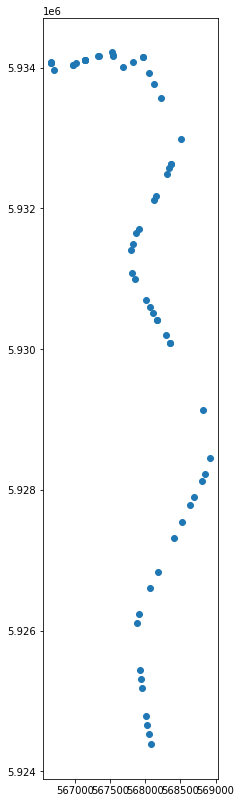

In [159]:
df.plot(figsize = (14,14))

In [160]:
def clr(array):
    col = []
    for value in array:
        if value > 0: 
            col.append('red')
        else:
            col.append('#C2FF00')
    return col

ovrspdclr = clr(df['ovrspd'])

In [162]:
lats = list(df['lat'])
lngs = list(df['lng'])
speed = list(df['ovrspd']) 

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], tiles = 'cartodbpositron', zoom_start=12)
for lat, lng , col, pop in zip(lats,lngs, ovrspdclr, speed ):
    folium.CircleMarker([lat, lng], color= col , radius=4.0, popup = pop).add_to(m)
m